<h1>Fase 1: Exploración y Limpieza</h1>

<h2> Exploración Inicial:</h2>

- [x] Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.
- [x] Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.
- [x] Une los dos conjuntos de datos de la forma más eficiente.

<h2> Limpieza de Datos: </h2>

- [x] Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.
- [x] Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.
- [x] Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico

<h2>Importación de librerías</h2>

In [535]:
# importamos las librerías
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Estadística
# ------------------------------------------------------------------------------
from scipy.stats import f_oneway

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

<h2>A. Primer DataFrame</h2>

<h3> 1. Carga de datos </h3>

In [536]:
# Cargamos Customer Loyalty History
clh_df = pd.read_csv("Customer Loyalty History.csv")

# Vemos algunas filas del DF
display(clh_df.head(3)) 
display(clh_df.tail(3)) 
display(clh_df.sample(3))

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
13166,536535,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,51667.0,Married,Star,4892.63,Standard,2012,10,NaN,NaN
10612,815498,Canada,Quebec,Montreal,H2T 2J6,Male,Bachelor,49355.0,Married,Star,2467.13,Standard,2018,6,NaN,NaN
3435,192994,Canada,Alberta,Banff,T4V 1D4,Male,High School or Below,63422.0,Married,Aurora,13171.01,Standard,2014,3,NaN,NaN


In [537]:
# Vemos la forma del DF
print(f"El número de filas es {clh_df.shape[0]}, el número de columnas es {clh_df.shape[1]}.") # con esto, visualizamos la forma del df

El número de filas es 16737, el número de columnas es 16.


<h3>2. Exploración inicial</h3>

In [538]:
# Vemos la información general: tipo de datos y nulos
clh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [539]:
# Vemos las estadísticas numéricas:
clh_df.describe(include = 'number').T 

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [540]:
# Vemos las estadísticas categóricas:
clh_df.describe(include='O').T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


In [541]:
# Vemos duplicados:
print(f"Duplicados totales: {clh_df.duplicated().sum()}")

Duplicados totales: 0


In [542]:
# Vemos los nulos, primero creando un df de nulos
nulos = (clh_df.isnull().sum()/clh_df.shape[0]*100).reset_index()
nulos.rename(columns = {'index': 'columna', 0: '% de nulos'}, inplace = True) # renombramos el índice
mascara_nulos = nulos['% de nulos'] > 0 # con esto nos quedamos únicamente con aquellos en los que aparecen nulos
nulos = nulos[mascara_nulos]
nulos

,columna,% de nulos
7,Salary,25.321145
14,Cancellation Year,87.650117
15,Cancellation Month,87.650117


De estos datos podemos sacar estas conclusiones de cara a futuras acciones de limpiado:
- Hay datos negativos en el salario que no tienen sentido
- Hay algunos outliers con salarios muy altos

In [543]:
# Aquí vamos a echar un vistazo general a todas las columnas

for col in clh_df.select_dtypes(include='O').columns:
    print(f"COLUMNA --> {col}")
    print(f"{clh_df[col].value_counts()}")
    print('_' * 150)

COLUMNA --> Country
Country
Canada    16737
Name: count, dtype: int64
______________________________________________________________________________________________________________________________________________________
COLUMNA --> Province
Province
Ontario                 5404
British Columbia        4409
Quebec                  3300
Alberta                  969
Manitoba                 658
New Brunswick            636
Nova Scotia              518
Saskatchewan             409
Newfoundland             258
Yukon                    110
Prince Edward Island      66
Name: count, dtype: int64
______________________________________________________________________________________________________________________________________________________
COLUMNA --> City
City
Toronto           3351
Vancouver         2582
Montreal          2059
Winnipeg           658
Whistler           582
Halifax            518
Ottawa             509
Trenton            486
Edmonton           486
Quebec City        485
D

En este caso, no hay ningún problema con las categorías, no hay repeticiones.

<h3>3. Limpieza de columnas</h3>

<b>Creamos una columna de fecha</b>

In [544]:
# Aquí vamos a crear un par de columnas extra para tener la información de mes/año junta tanto en
# afiliación como en cancelación

# Creamos la columna de fecha de inscripción
clh_df['Enrollment Date'] = pd.to_datetime( # creamos la columna "Enrollment Date" y con pd.to_datetime transformamos en fecha
    clh_df['Enrollment Year'].astype(str) + '-' + 
    clh_df['Enrollment Month'].astype(str), # la componemos de "Enrollment Year" y
                                            # usamos astype(str) para transformarla en cadena de texto
                                            # para poder concatenar año y mes
                                            # con el + '-' + concatenamos
    format='%Y-%m' # aquí le damos el formato, explicamos a pandas cómo: %Y es año de 4 dígitos y %m es mes de dos dígitos
                   # como no hay día, pandas usará directamente el primer día de cada mes
)

# Creamos la columna de fecha de cancelación (y en este caso tenemos que manejar NaN automáticamente)
clh_df['Cancellation Date'] = pd.to_datetime(
    clh_df['Cancellation Year'].astype('Int64').astype(str) + '-' +
    clh_df['Cancellation Month'].astype('Int64').astype(str),
    format='%Y-%m',
    errors='coerce'  # convierte NaN en NaT porque, si no, pd.to_datetime dará un error -> si concatenamos NaN lo que va a salir es 
                     # "nan-nan" y pandas no lo va a poder interpretar como fecha.  
                     # NaT es NaN pero para fechas. "Coerce" es una forma de indicar que si no se puede convertir en fecha, se convierta en NaT
)

# Revisamos los cambios:

clh_df.info()

# Ahora podemos:
# - Filtrar por rangos de fechas.
# - Hacer cálculos sobre la duración de la afiliación.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Loyalty Number      16737 non-null  int64         
 1   Country             16737 non-null  object        
 2   Province            16737 non-null  object        
 3   City                16737 non-null  object        
 4   Postal Code         16737 non-null  object        
 5   Gender              16737 non-null  object        
 6   Education           16737 non-null  object        
 7   Salary              12499 non-null  float64       
 8   Marital Status      16737 non-null  object        
 9   Loyalty Card        16737 non-null  object        
 10  CLV                 16737 non-null  float64       
 11  Enrollment Type     16737 non-null  object        
 12  Enrollment Year     16737 non-null  int64         
 13  Enrollment Month    16737 non-null  int64     

<b>Normalizamos el nombre de las columnas</b>

In [545]:
# convertimos los nombres de las columnas a minúscula y sin espacios para evitar futuros problemas

nuevas_columnas = {col: col.lower().replace(' ', '_') for col in clh_df.columns}
clh_df.rename(columns=nuevas_columnas, inplace=True)
clh_df.columns

Index(['loyalty_number', 'country', 'province', 'city', 'postal_code',
       'gender', 'education', 'salary', 'marital_status', 'loyalty_card',
       'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month',
       'cancellation_year', 'cancellation_month', 'enrollment_date',
       'cancellation_date'],
      dtype='object')

<h3> 4. Análisis exploratorio y visual</h3>

<b> Histogramas </b>

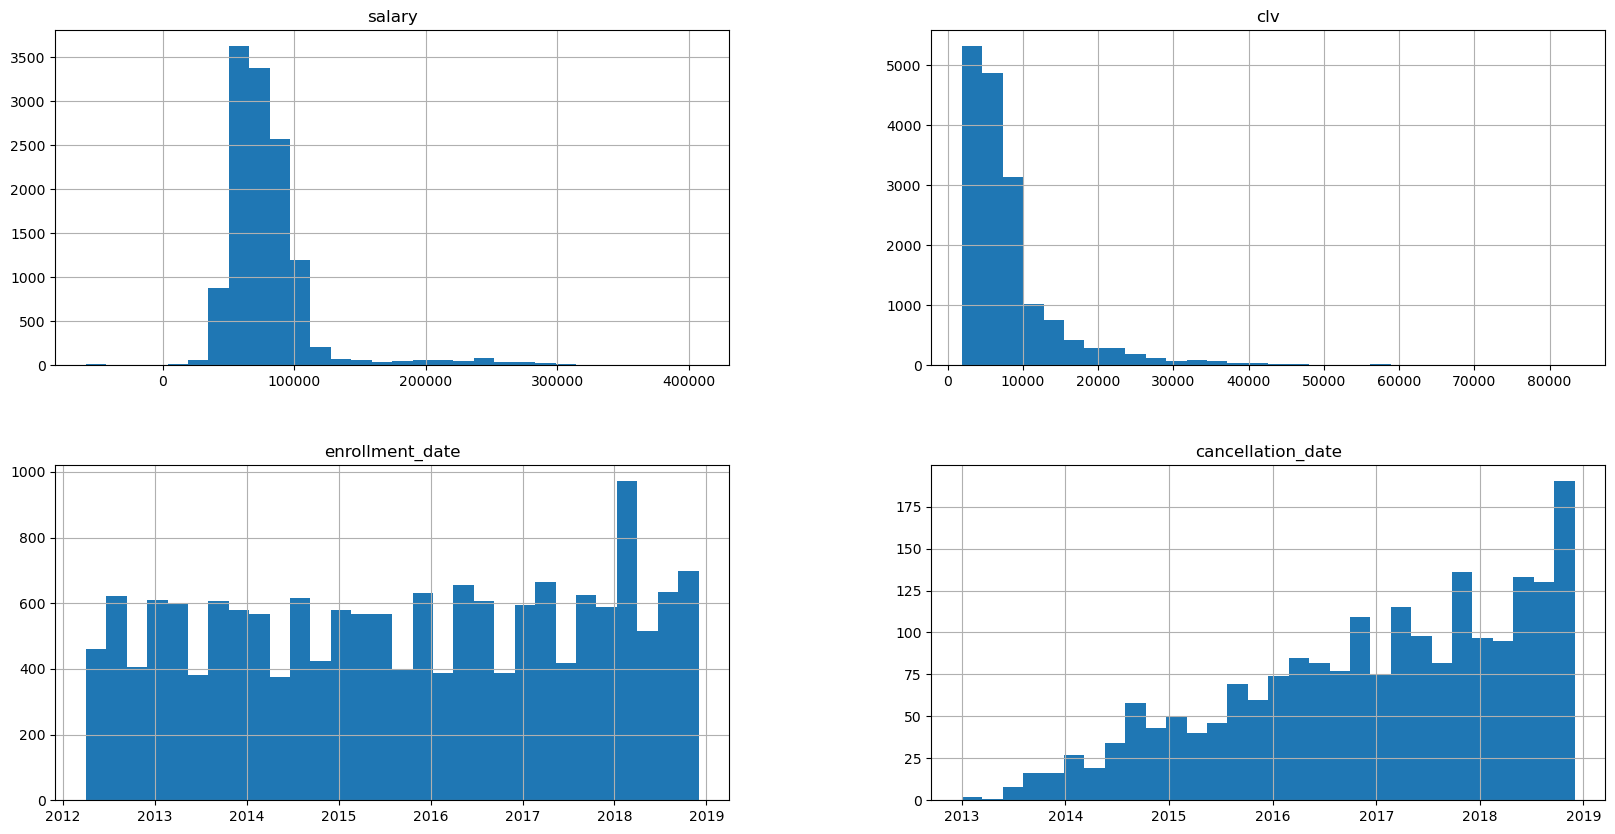

In [546]:
clh_df[["salary", "clv", "enrollment_date", "cancellation_date"]].hist(bins=30, figsize=(20,10))
plt.show();

<b> Boxplots y valores atípicos</b>

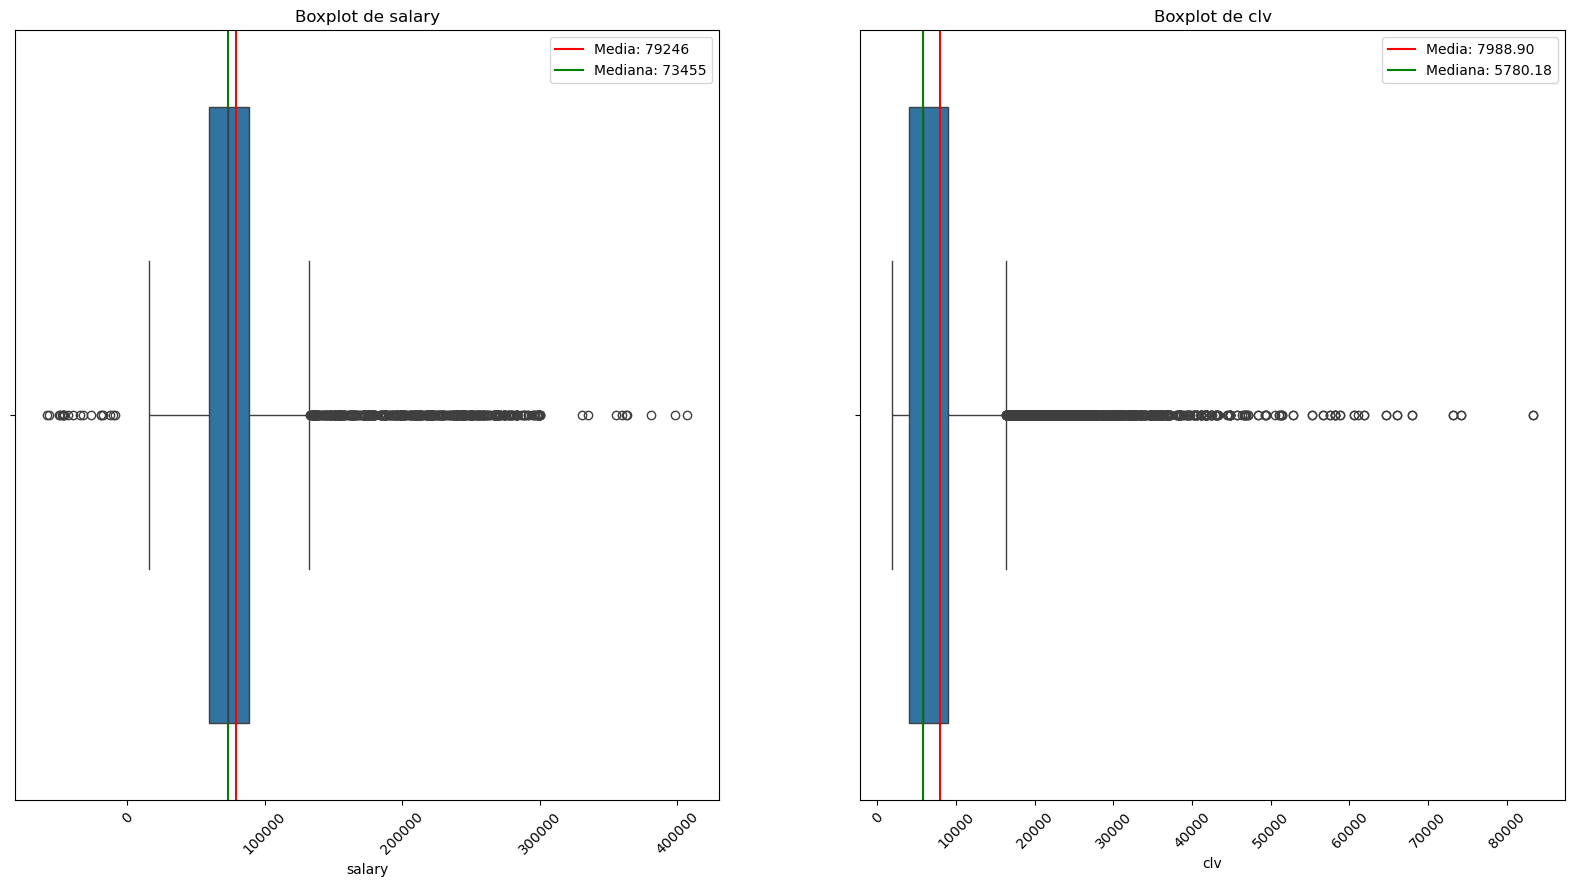

In [547]:
# Creamos una figura con 1 fila y 2 columnas
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Boxplot de salary
sns.boxplot(data=clh_df, x='salary', ax=axes[0])
axes[0].set_title('Boxplot de salary')
salary_media = clh_df['salary'].mean()
salary_mediana = clh_df['salary'].median()
axes[0].axvline(salary_media, color='red', linestyle='-', label=f'Media: {salary_media:.0f}')
axes[0].axvline(salary_mediana, color='green', linestyle='-', label=f'Mediana: {salary_mediana:.0f}')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)  # rotar labels

# Boxplot de clv
sns.boxplot(data=clh_df, x='clv', ax=axes[1])
axes[1].set_title('Boxplot de clv')
clv_media = clh_df['clv'].mean()
clv_mediana = clh_df['clv'].median()
axes[1].axvline(clv_media, color='red', linestyle='-', label=f'Media: {clv_media:.2f}')
axes[1].axvline(clv_mediana, color='green', linestyle='-', label=f'Mediana: {clv_mediana:.2f}')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)  # rotar labels 

plt.show();

<h3>5. Manejo de valores atípicos y nulos</h3>

<b>Salarios negativos</b>

In [548]:
# Aquí vamos a transformar los valores de salary menores a 0 en nulos para que no nos distorsionen las estadísticas:

# Reemplazar los salary menores que 0 por NaN
clh_df.loc[clh_df['salary'] < 0, 'salary'] = np.nan
(clh_df['salary'] < 0).sum()

0

<b> Imputación de nulos </b>

In [549]:
# Imputamos salary con mediana, aunque podríamos usar la media porque no es lejana
clh_df['salary'] = clh_df['salary'].fillna(salary_mediana)
clh_df['salary'].isnull().sum()
clh_df.describe() #confirmamos que han funcionado los cambios

,loyalty_number,salary,clv,enrollment_year,enrollment_month,cancellation_year,cancellation_month,enrollment_date,cancellation_date
count,16737.000000,16737.000000,16737.000000,16737.000000,16737.000000,2067.000000,2067.000000,16737,2067
mean,549735.880445,77909.603095,7988.896536,2015.253211,6.669116,2016.503145,6.962748,2015-09-22 11:45:55.977773824,2016-12-30 23:07:03.222060800
min,100018.000000,15609.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000,2012-04-01 00:00:00,2013-01-01 00:00:00
25%,326603.000000,63991.000000,3980.840000,2014.000000,4.000000,2016.000000,4.000000,2014-01-01 00:00:00,2016-01-01 00:00:00
50%,550434.000000,73455.000000,5780.180000,2015.000000,7.000000,2017.000000,7.000000,2015-11-01 00:00:00,2017-04-01 00:00:00
75%,772019.000000,82940.000000,8940.580000,2017.000000,10.000000,2018.000000,10.000000,2017-07-01 00:00:00,2018-03-01 00:00:00
max,999986.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000,2018-12-01 00:00:00,2018-12-01 00:00:00
std,258912.132453,30098.860146,6860.982280,1.979111,3.398958,1.380743,3.455297,NaN,NaN


<h2>B. Segundo DataFrame</h2>

<h3>1. Carga de datos</h3>

In [550]:
cfa_df = pd.read_csv("Customer Flight Activity.csv")

In [551]:
# Exploración rápida del DataFrame
display(cfa_df.head(3))   # Primeras 3 filas
display(cfa_df.tail(3))   # Últimas 3 filas
display(cfa_df.sample(3)) # 3 filas aleatorias

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
65954,911744,2017,4,0,0,0,0,0.0,0,0
55029,331598,2017,4,0,0,0,0,0.0,0,0
196339,654249,2017,12,0,0,0,0,0.0,0,0


In [552]:
# Forma del DataFrame
print(f"El número de filas es {cfa_df.shape[0]}, el número de columnas es {cfa_df.shape[1]}.")

El número de filas es 405624, el número de columnas es 10.


<h3>2. Exploración inicial</h3>

In [553]:
# Información general: tipos de datos, nulos
cfa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [554]:
# Estadísticas numéricas
display(cfa_df.describe(include='number').T)

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [555]:
# Duplicados
print(f"Duplicados totales: {cfa_df.duplicated().sum()}")

Duplicados totales: 1864


In [556]:
duplicados = cfa_df[cfa_df.duplicated(keep=False)].sort_values(
    ["Loyalty Number", "Year", "Month"]
)
display(duplicados.head(10))
duplicados.shape

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
41,101902,2017,1,0,0,0,0,0.0,0,0
42,101902,2017,1,0,0,0,0,0.0,0,0
16942,101902,2017,2,0,0,0,0,0.0,0,0
16943,101902,2017,2,0,0,0,0,0.0,0,0
33843,101902,2017,3,0,0,0,0,0.0,0,0
33844,101902,2017,3,0,0,0,0,0.0,0,0
101447,101902,2017,7,0,0,0,0,0.0,0,0
101448,101902,2017,7,0,0,0,0,0.0,0,0
185952,101902,2017,12,0,0,0,0,0.0,0,0
185953,101902,2017,12,0,0,0,0,0.0,0,0


(3712, 10)

In [557]:
# Nulos
nulos_cfa = (cfa_df.isnull().sum()/cfa_df.shape[0]*100).reset_index()
nulos_cfa.rename(columns={'index':'columna', 0:'% de nulos'}, inplace=True)
nulos_cfa = nulos_cfa[nulos_cfa['% de nulos'] > 0]
display(nulos_cfa)

,columna,% de nulos


<h3>3. Limpieza de columnas</h3>

<b>Normalizamos el nombre de las columnas</b>

In [558]:
# Normalización de nombres de columnas
cfa_df.columns = [col.lower().replace(' ', '_') for col in cfa_df.columns]
# Verificamos los cambios
cfa_df.columns

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed'],
      dtype='object')

In [559]:
# Crear columna de fecha a partir de year y month

cfa_df['flight_date'] = pd.to_datetime(
    # Convertimos 'year' y 'month' a cadena de texto para poder concatenarlas
    cfa_df['year'].astype(str) + '-' + cfa_df['month'].astype(str),
    # Indicamos el formato: %Y = año de 4 dígitos, %m = mes de 2 dígitos
    format='%Y-%m'
    # Como no se proporciona día, pandas asignará automáticamente el primer día del mes
)

# Revisamos los cambios
cfa_df.info()
display(cfa_df.head(3))

# Ahora podemos:
# - Filtrar vuelos por rangos de fechas
# - Agrupar por mes o año fácilmente
# - Calcular métricas temporales como promedio de vuelos, puntos, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   loyalty_number               405624 non-null  int64         
 1   year                         405624 non-null  int64         
 2   month                        405624 non-null  int64         
 3   flights_booked               405624 non-null  int64         
 4   flights_with_companions      405624 non-null  int64         
 5   total_flights                405624 non-null  int64         
 6   distance                     405624 non-null  int64         
 7   points_accumulated           405624 non-null  float64       
 8   points_redeemed              405624 non-null  int64         
 9   dollar_cost_points_redeemed  405624 non-null  int64         
 10  flight_date                  405624 non-null  datetime64[ns]
dtypes: datetime64[ns](1), floa

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,flight_date
0,100018,2017,1,3,0,3,1521,152.0,0,0,2017-01-01
1,100102,2017,1,10,4,14,2030,203.0,0,0,2017-01-01
2,100140,2017,1,6,0,6,1200,120.0,0,0,2017-01-01


<h3>4. Análisis exploratorio y visual</h3>

<b> Histogramas </b>

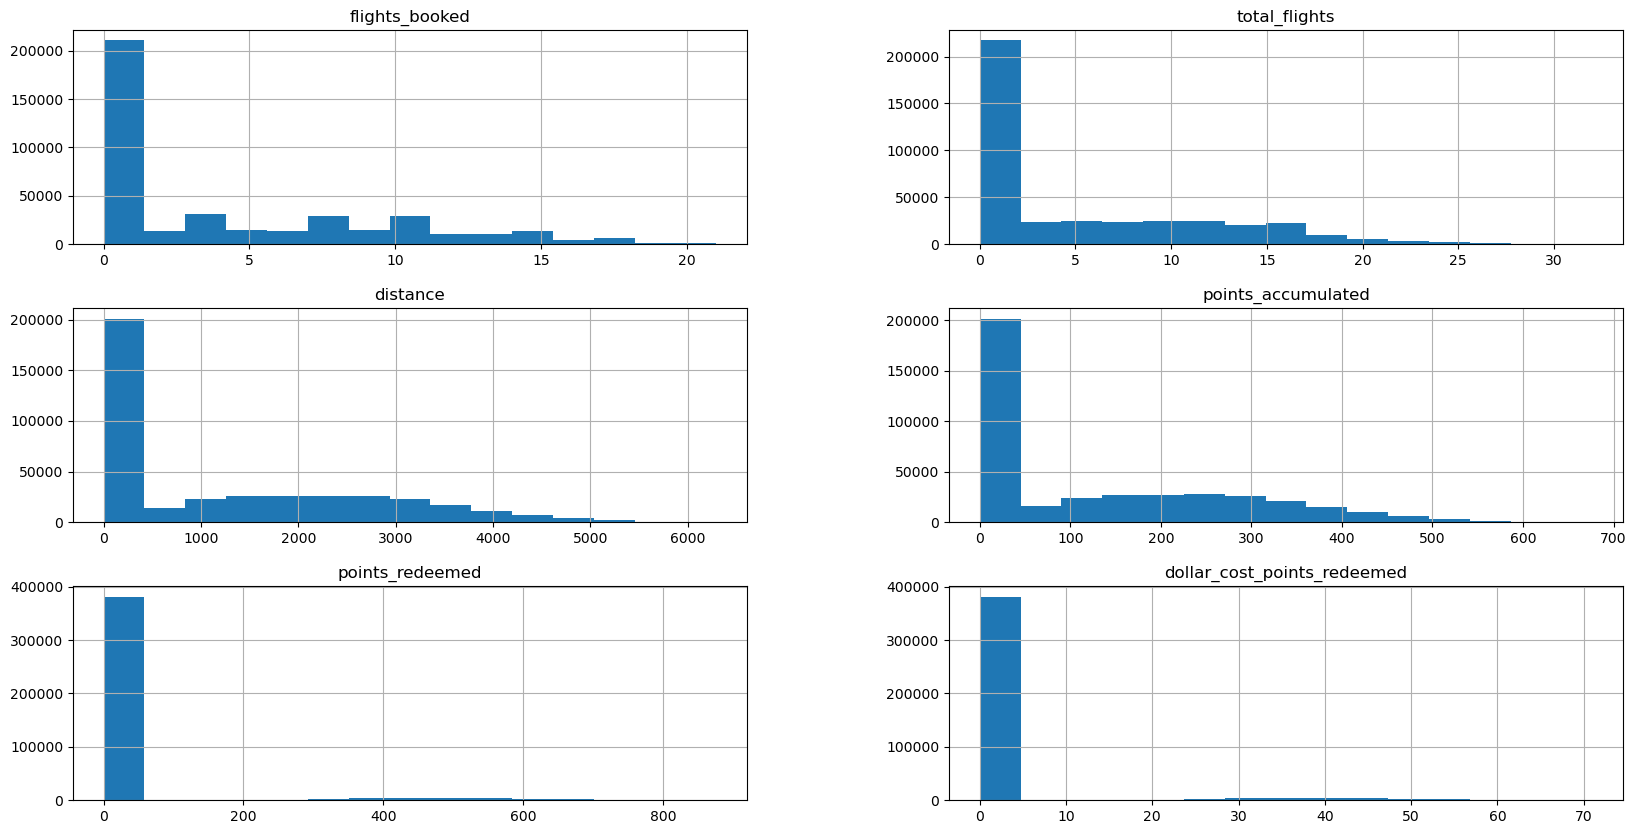

In [560]:
cfa_df[["flights_booked", "total_flights", "distance",
        "points_accumulated", "points_redeemed", "dollar_cost_points_redeemed"]].hist(
            bins = 15, figsize = (20, 10)
        )
plt.show();

<b>Boxplots</b>

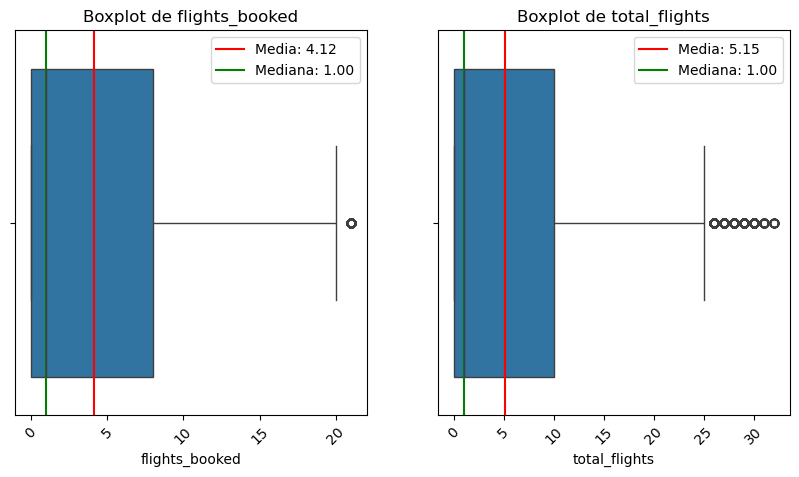

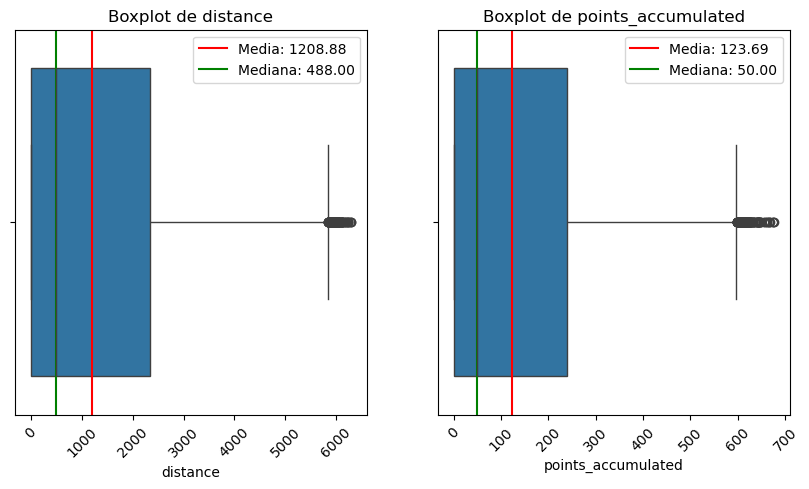

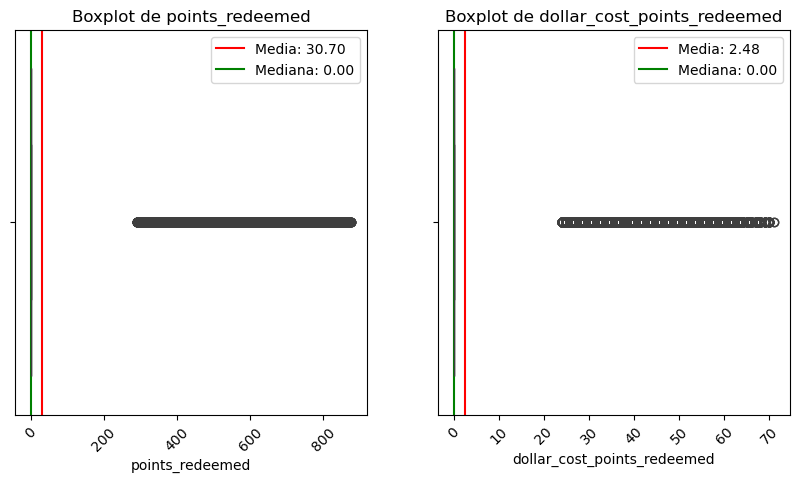

In [561]:
# Hacemos hueco para flights_booked y para total_flights
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Para flights_booked:
sns.boxplot(data=cfa_df, x='flights_booked', ax=axes[0])
axes[0].set_title('Boxplot de flights_booked')
fb_media = cfa_df['flights_booked'].mean()
fb_mediana = cfa_df['flights_booked'].median()
axes[0].axvline(fb_media, color='red', linestyle='-', label=f'Media: {fb_media:.2f}')
axes[0].axvline(fb_mediana, color='green', linestyle='-', label=f'Mediana: {fb_mediana:.2f}')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# Para total_flights:
sns.boxplot(data=cfa_df, x='total_flights', ax=axes[1])
axes[1].set_title('Boxplot de total_flights')
tf_media = cfa_df['total_flights'].mean()
tf_mediana = cfa_df['total_flights'].median()
axes[1].axvline(tf_media, color='red', linestyle='-', label=f'Media: {tf_media:.2f}')
axes[1].axvline(tf_mediana, color='green', linestyle='-', label=f'Mediana: {tf_mediana:.2f}')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)

plt.show()

# Otro hueco para distance y para points_accumulated
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Para distance
sns.boxplot(data=cfa_df, x='distance', ax=axes[0])
axes[0].set_title('Boxplot de distance')
dist_media = cfa_df['distance'].mean()
dist_mediana = cfa_df['distance'].median()
axes[0].axvline(dist_media, color='red', linestyle='-', label=f'Media: {dist_media:.2f}')
axes[0].axvline(dist_mediana, color='green', linestyle='-', label=f'Mediana: {dist_mediana:.2f}')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# Para points_accumulated
sns.boxplot(data=cfa_df, x='points_accumulated', ax=axes[1])
axes[1].set_title('Boxplot de points_accumulated')
pa_media = cfa_df['points_accumulated'].mean()
pa_mediana = cfa_df['points_accumulated'].median()
axes[1].axvline(pa_media, color='red', linestyle='-', label=f'Media: {pa_media:.2f}')
axes[1].axvline(pa_mediana, color='green', linestyle='-', label=f'Mediana: {pa_mediana:.2f}')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)

plt.show()

# Y otro hueco para points_redeemed y para dollar_cost_points_redeemed
fig, axes = plt.subplots(1, 2, figsize =(10, 5))

# Para points_redeemed
sns.boxplot(data=cfa_df, x='points_redeemed', ax=axes[0])
axes[0].set_title('Boxplot de points_redeemed')
pr_media = cfa_df['points_redeemed'].mean()
pr_mediana = cfa_df['points_redeemed'].median()
axes[0].axvline(pr_media, color='red', linestyle='-', label=f'Media: {pr_media:.2f}')
axes[0].axvline(pr_mediana, color='green', linestyle='-', label=f'Mediana: {pr_mediana:.2f}')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# Para dollar_cost_points_redeemed
sns.boxplot(data=cfa_df, x='dollar_cost_points_redeemed', ax=axes[1])
axes[1].set_title('Boxplot de dollar_cost_points_redeemed')
dc_media = cfa_df['dollar_cost_points_redeemed'].mean()
dc_mediana = cfa_df['dollar_cost_points_redeemed'].median()
axes[1].axvline(dc_media, color='red', linestyle='-', label=f'Media: {dc_media:.2f}')
axes[1].axvline(dc_mediana, color='green', linestyle='-', label=f'Mediana: {dc_mediana:.2f}')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)

plt.show();

<h3>5. Manejo de valores atípicos y nulos</h3>

<b>Limpieza de duplicados</b>

In [562]:
# Verificamos cuántos duplicados hay excluyendo el original
duplicados = cfa_df[cfa_df.duplicated(keep="first")].sort_values(
    ["loyalty_number", "year", "month"]
)
print(f"Número de filas duplicadas: {duplicados.shape[0]}")

# Eliminamos duplicados
cfa_df = cfa_df.drop_duplicates()

# Verificamos que se eliminaron
print(f"Número de filas después de eliminar duplicados: {cfa_df.shape[0]}")


Número de filas duplicadas: 1864
Número de filas después de eliminar duplicados: 403760


<h2>Unión de los dos conjuntos de datos</h2>

In [563]:
# Merge por loyalty_number, manteniendo todos los clientes de clh_df
df_unido = pd.merge(
    clh_df,        # DF principal
    cfa_df,        # DF que se va a unir
    on='loyalty_number',  # Columna de unión
    how='left'     # Mantenemos todos los registros de clh_df
)

print(f"Forma del DataFrame combinado: {df_unido.shape}")
display(df_unido.head(5))
display(df_unido.tail(5))
display(df_unido.sample(5))

Forma del DataFrame combinado: (403760, 28)


,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,enrollment_date,cancellation_date,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,flight_date
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2016-02-01,NaT,2017,1,0,0,0,0,0.0,0,0,2017-01-01
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2016-02-01,NaT,2017,2,3,0,3,2823,282.0,0,0,2017-02-01
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2016-02-01,NaT,2017,3,0,0,0,0,0.0,0,0,2017-03-01
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2016-02-01,NaT,2017,4,0,0,0,0,0.0,0,0,2017-04-01
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2016-02-01,NaT,2018,10,6,2,8,3352,335.0,465,38,2018-10-01


,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,enrollment_date,cancellation_date,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,flight_date
403755,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2015-12-01,2016-08-01,2018,8,0,0,0,0,0.0,0,0,2018-08-01
403756,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2015-12-01,2016-08-01,2018,9,0,0,0,0,0.0,0,0,2018-09-01
403757,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2015-12-01,2016-08-01,2018,10,0,0,0,0,0.0,0,0,2018-10-01
403758,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2015-12-01,2016-08-01,2018,11,0,0,0,0,0.0,0,0,2018-11-01
403759,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2015-12-01,2016-08-01,2018,12,0,0,0,0,0.0,0,0,2018-12-01


,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,enrollment_date,cancellation_date,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,flight_date
321459,192405,Canada,Quebec,Montreal,H4G 3T4,Male,Bachelor,58127.0,Divorced,Star,5043.80,Standard,2013,4,NaN,NaN,2013-04-01,NaT,2017,2,4,3,7,665,66.0,0,0,2017-02-01
322481,811162,Canada,Newfoundland,St. John's,A1C 6H9,Female,College,73455.0,Married,Star,5095.44,Standard,2012,7,NaN,NaN,2012-07-01,NaT,2018,3,0,0,0,0,0.0,0,0,2018-03-01
11048,568547,Canada,New Brunswick,Fredericton,E3B 2H2,Female,College,73455.0,Married,Star,4648.54,Standard,2016,2,NaN,NaN,2016-02-01,NaT,2017,10,2,2,4,2468,246.0,0,0,2017-10-01
336914,256486,Canada,British Columbia,Vancouver,V6E 3D9,Female,Bachelor,82599.0,Married,Star,5797.60,Standard,2016,7,NaN,NaN,2016-07-01,NaT,2018,8,0,0,0,0,0.0,0,0,2018-08-01
260645,462663,Canada,British Columbia,Vancouver,V6E 3D9,Female,Bachelor,50858.0,Married,Star,2500.83,Standard,2015,10,NaN,NaN,2015-10-01,NaT,2018,1,0,0,0,0,0.0,0,0,2018-01-01


<h1>Fase 2: Visualización</h1>

Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:

  - [x] ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
  - [x] ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?
  - [x] ¿Cuál es la distribución de los clientes por provincia o estado?
  - [x] ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
  - [x] ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
  - [x] ¿Cómo se distribuyen los clientes según su estado civil y género?

<h2>1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?</h2>

En este caso, tiene más sentido usar un lineplot para ver la evolución temporal.

Atendiendo al gráfico, vemos que los meses de verano y algo menos diciembre tienen la mayor cantidad de reservas. Además, justo antes y justo después se da una caída bastante acusada. Finalmente, en torno a la Pascua vuelve a haber un incremento, aunque no tan acusado como los otros dos.

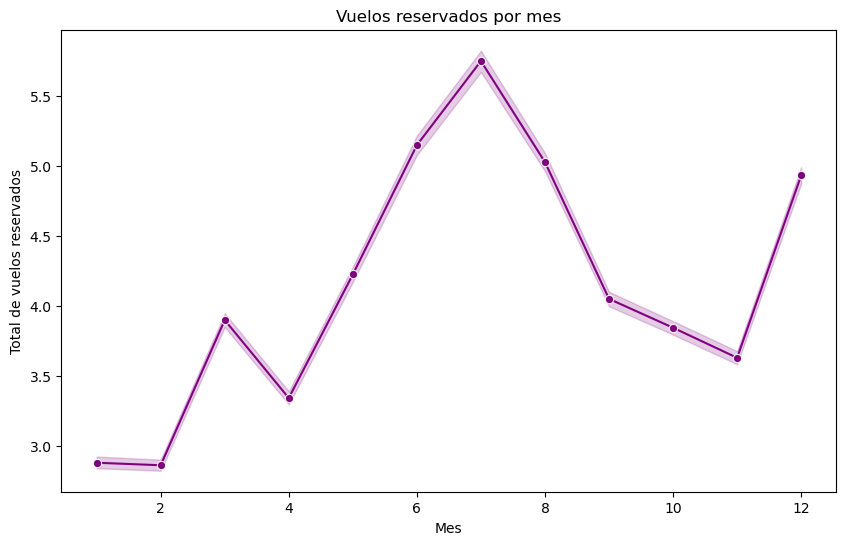

In [564]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_unido, 
             x="month", 
             y="flights_booked", 
             marker="o", 
             color="purple")
plt.title("Vuelos reservados por mes")
plt.xlabel("Mes")
plt.ylabel("Total de vuelos reservados")
plt.show();

<h2>2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?</h2>

Para ver relaciones entre dos variables numéricas es interesante usar el scatterplot, para ver si hay correlaciones entre ellas y visualizar más rápidamente los posibles patrones no lineales, atípicos, etc.

Parece que el aumento de puntos acumulados es proporcional a la distancia recorrida. Sin embargo, al haber cuatro líneas diferentes, es interesante añadir otras gráficas para ver si se relaciona, también, con el tipo de "loyalty_card" (Star, Aurora, Nova). Para eso, hacemos un scatterplot en el que vamos a meter una nueva columna, la tasa de acumulación (calculada con los puntos acumulados/los kilómetros recorridos), y vamos a diferenciar por colores las diferentes loyalty cards. Como resultado, Aurora claramente permite acumular más puntos por km, seguido por Nova y, finalmente, Star. 

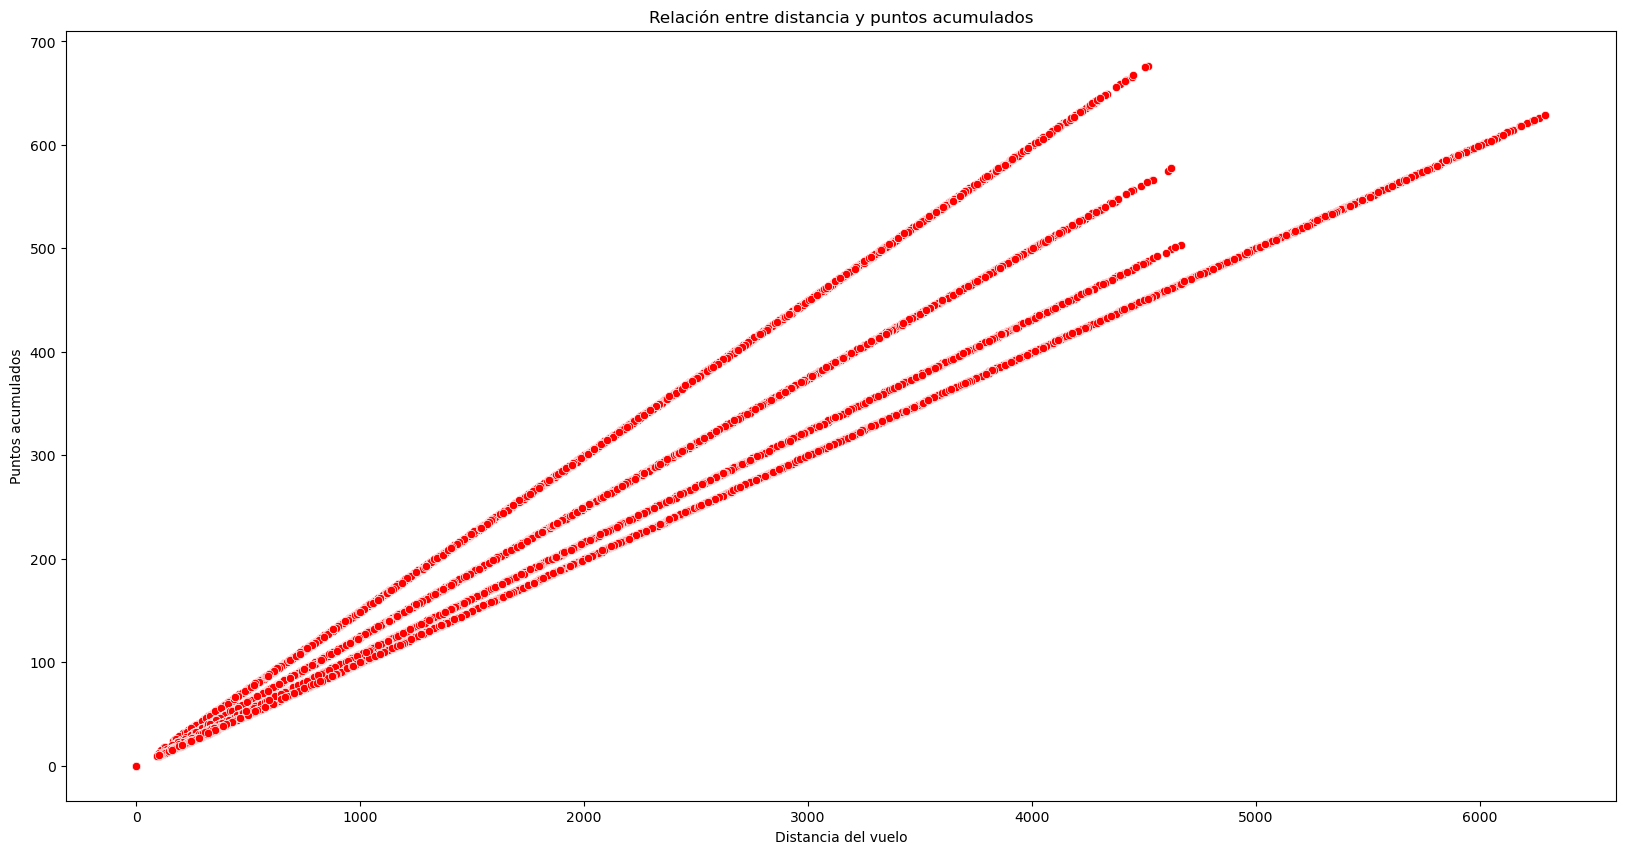

In [565]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_unido, 
                x="distance", 
                y="points_accumulated",
                color = "red")
plt.title("Relación entre distancia y puntos acumulados")
plt.xlabel("Distancia del vuelo")
plt.ylabel("Puntos acumulados")
plt.show();

In [566]:
df_unido["loyalty_card"].unique()

array(['Star', 'Aurora', 'Nova'], dtype=object)

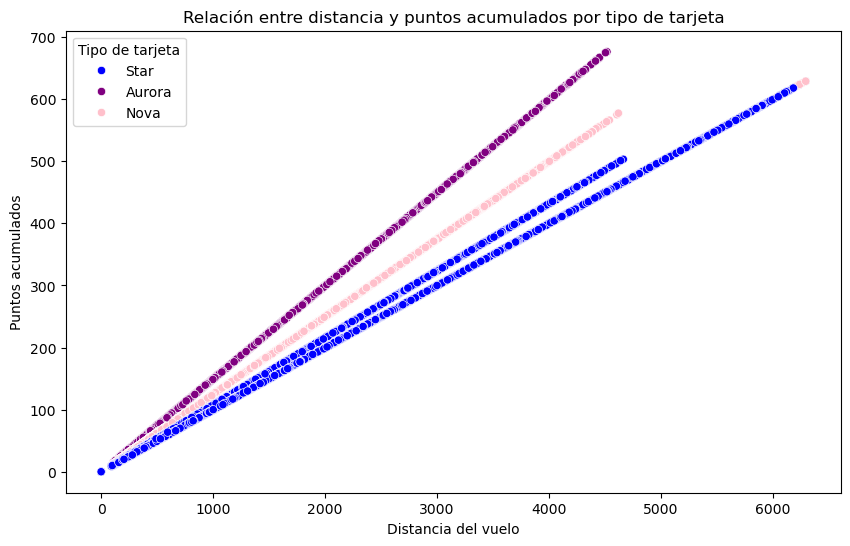

In [567]:
# Creamos la tasa de acumulación
df_unido["puntos_por_km"] = df_unido["points_accumulated"] / df_unido["distance"]

# Hacemos el scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_unido,
    x="distance",
    y="points_accumulated",
    hue="loyalty_card",   # Columna con valores Star, Aurora, Nova
    palette={
        "Star": "blue",
        "Aurora": "purple",
        "Nova": "pink"
    }
)
plt.title("Relación entre distancia y puntos acumulados por tipo de tarjeta")
plt.xlabel("Distancia del vuelo")
plt.ylabel("Puntos acumulados")
plt.legend(title="Tipo de tarjeta")
plt.show();

<h2>3. ¿Cuál es la distribución de los clientes por provincia o estado?</h2>

Para esta variable categórica, vamos a usar un gráfico de barras, ya que no necesitamos ver valores continuos.

- Primero, observamos el número absoluto de clientes por provincia. Ontario, British Columbia y Quebec son, con diferencia, las provincias con más clientes.
- Luego, es interesante ver estos resultados en relación con la proporción que representan respecto a la población de cada provincia, dado que Canadá tiene una distribución geográfica muy desigual.
- Para ello, crearemos un diccionario con la población de cada provincia y visualizaremos los resultados comparando:
  1. El porcentaje de clientes respecto al total de clientes canadienses (100% del dataset).
  2. El porcentaje de clientes respecto a la población total de cada provincia.

De esta forma, no solo sabremos dónde se concentran la mayor cantidad de clientes, sino también dónde se controla el mayor porcentaje del mercado.

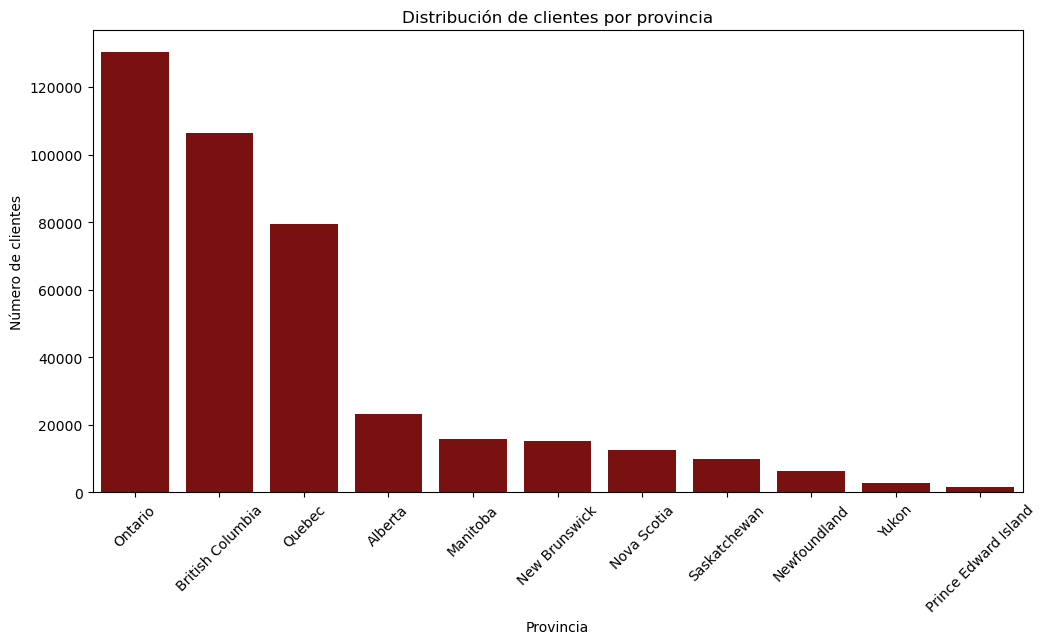

In [568]:
plt.figure(figsize=(12,6))
sns.countplot(
    data=df_unido, 
    x="province", 
    order=df_unido["province"].value_counts().index,
    color = "darkred"
)
plt.title("Distribución de clientes por provincia")
plt.xlabel("Provincia")
plt.ylabel("Número de clientes")
plt.xticks(rotation=45)
plt.show();

In [569]:
poblacion_canada = {
    "Ontario": 14734014,
    "Quebec": 8575779,
    "British Columbia": 5147712,
    "Alberta": 4428112,
    "Manitoba": 1379263,
    "Saskatchewan": 1178681,
    "Nova Scotia": 979351,
    "New Brunswick": 781476,
    "Newfoundland": 510550, 
    "Prince Edward Island": 164318,
    "Northwest Territories": 44904,
    "Yukon": 42276,
    "Nunavut": 39285
}

clientes_por_provincia = df_unido["province"].value_counts() # seleccionamos la columna provincias y contamos

porcentaje_poblacion = clientes_por_provincia.copy() # hacemos una copia para hacer algo temporal

# Convertimos la serie a float antes de operar porque, sino, saltan warnings
porcentaje_poblacion = clientes_por_provincia.copy().astype(float)

for provincia in porcentaje_poblacion.index:
    porcentaje_poblacion[provincia] = (porcentaje_poblacion[provincia] / poblacion_canada[provincia]) * 100

# Convertimos a DataFrame
porcentaje_poblacion = porcentaje_poblacion.reset_index()
porcentaje_poblacion.columns = ["province", "porcentaje_sobre_poblacion"]
display(porcentaje_poblacion)

,province,porcentaje_sobre_poblacion
0,Ontario,0.884063
1,British Columbia,2.067754
2,Quebec,0.927881
3,Alberta,0.527539
4,Manitoba,1.152790
5,New Brunswick,1.964488
6,Nova Scotia,1.277070
7,Saskatchewan,0.836613
8,Newfoundland,1.222995
9,Yukon,6.336929


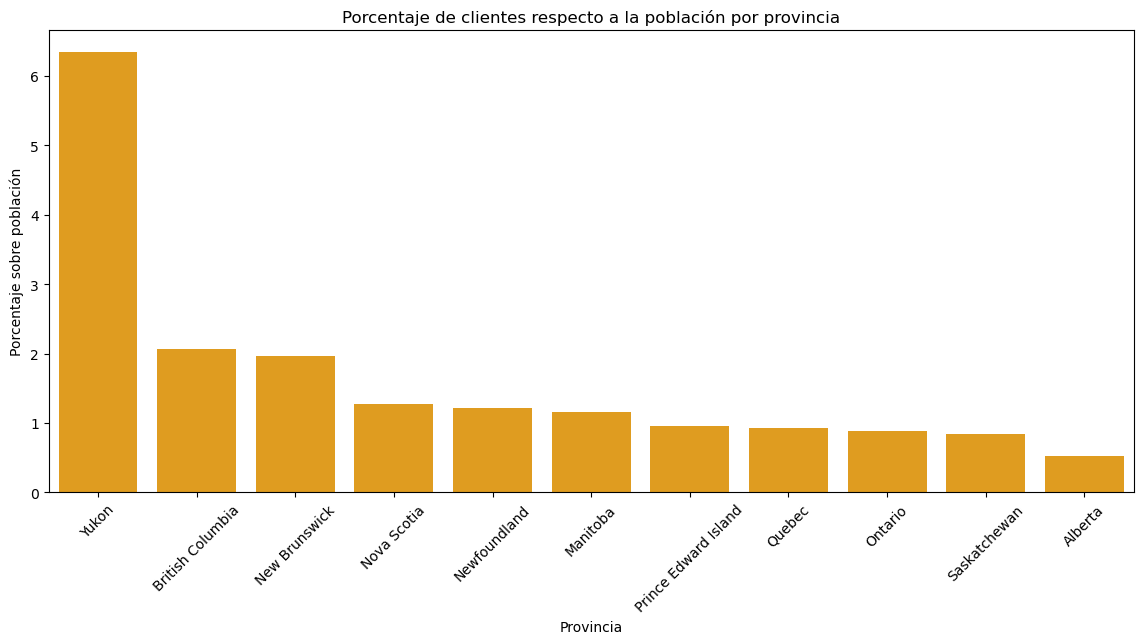

In [570]:
# Primero, vamos a ordenar las provincias según el porcentaje
orden_poblacion = porcentaje_poblacion.sort_values(
    "porcentaje_sobre_poblacion", 
    ascending=False
)["province"]

plt.figure(figsize=(14,6))
sns.barplot(
    x=porcentaje_poblacion["province"], 
    y=porcentaje_poblacion["porcentaje_sobre_poblacion"],
    order = orden_poblacion, 
    color="orange" 
)
plt.title("Porcentaje de clientes respecto a la población por provincia")
plt.xlabel("Provincia")
plt.ylabel("Porcentaje sobre población")
plt.xticks(rotation=45)
plt.show();

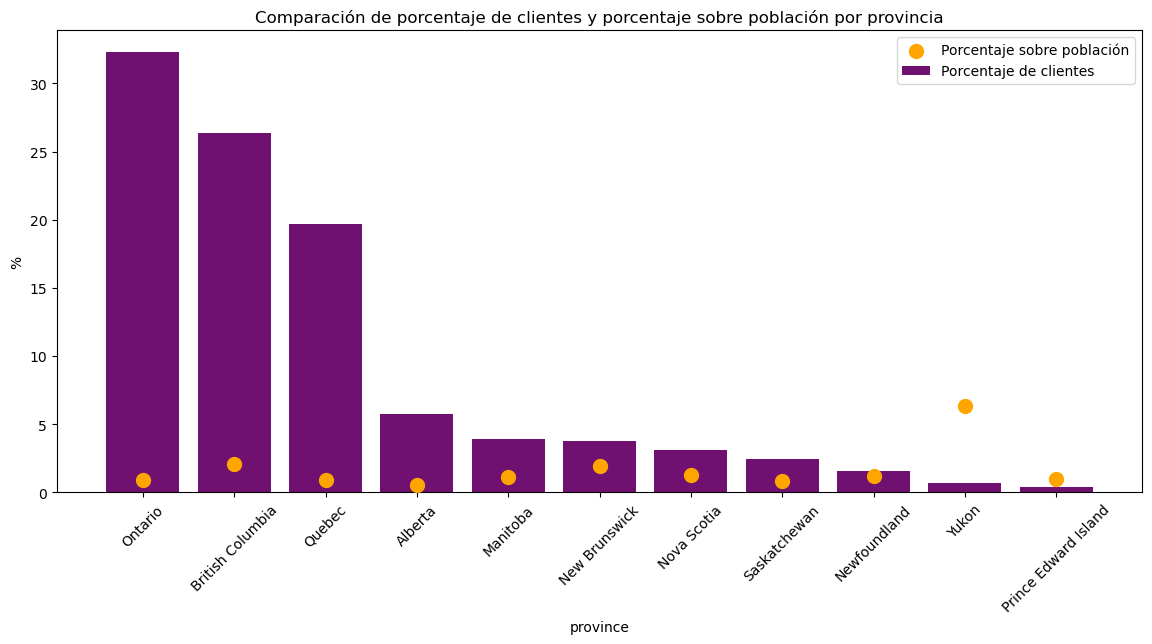

In [571]:
# Calculamos porcentaje de clientes respecto al total de clientes
clientes_por_provincia_pct = (df_unido["province"].value_counts() / len(df_unido)) * 100

# Creamos DataFrame para graficar
df_plot = porcentaje_poblacion.copy()
df_plot["porcentaje_clientes"] = clientes_por_provincia_pct.reindex(df_plot["province"]).values

# Gráfico
plt.figure(figsize=(14,6))

# Barras: porcentaje de clientes
sns.barplot(
    x="province",
    y="porcentaje_clientes",
    data=df_plot,
    color="purple",
    label="Porcentaje de clientes"
)

# Puntos: porcentaje sobre población
plt.scatter(
    x=df_plot["province"],
    y=df_plot["porcentaje_sobre_poblacion"],
    color="orange",
    s=100,
    label="Porcentaje sobre población",
    zorder=5 # esto lo usamos para sobreponer elementos
)

plt.xticks(rotation=45)
plt.ylabel("%")
plt.title("Comparación de porcentaje de clientes y porcentaje sobre población por provincia")
plt.legend()
plt.show();

<h3>4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?</h3>

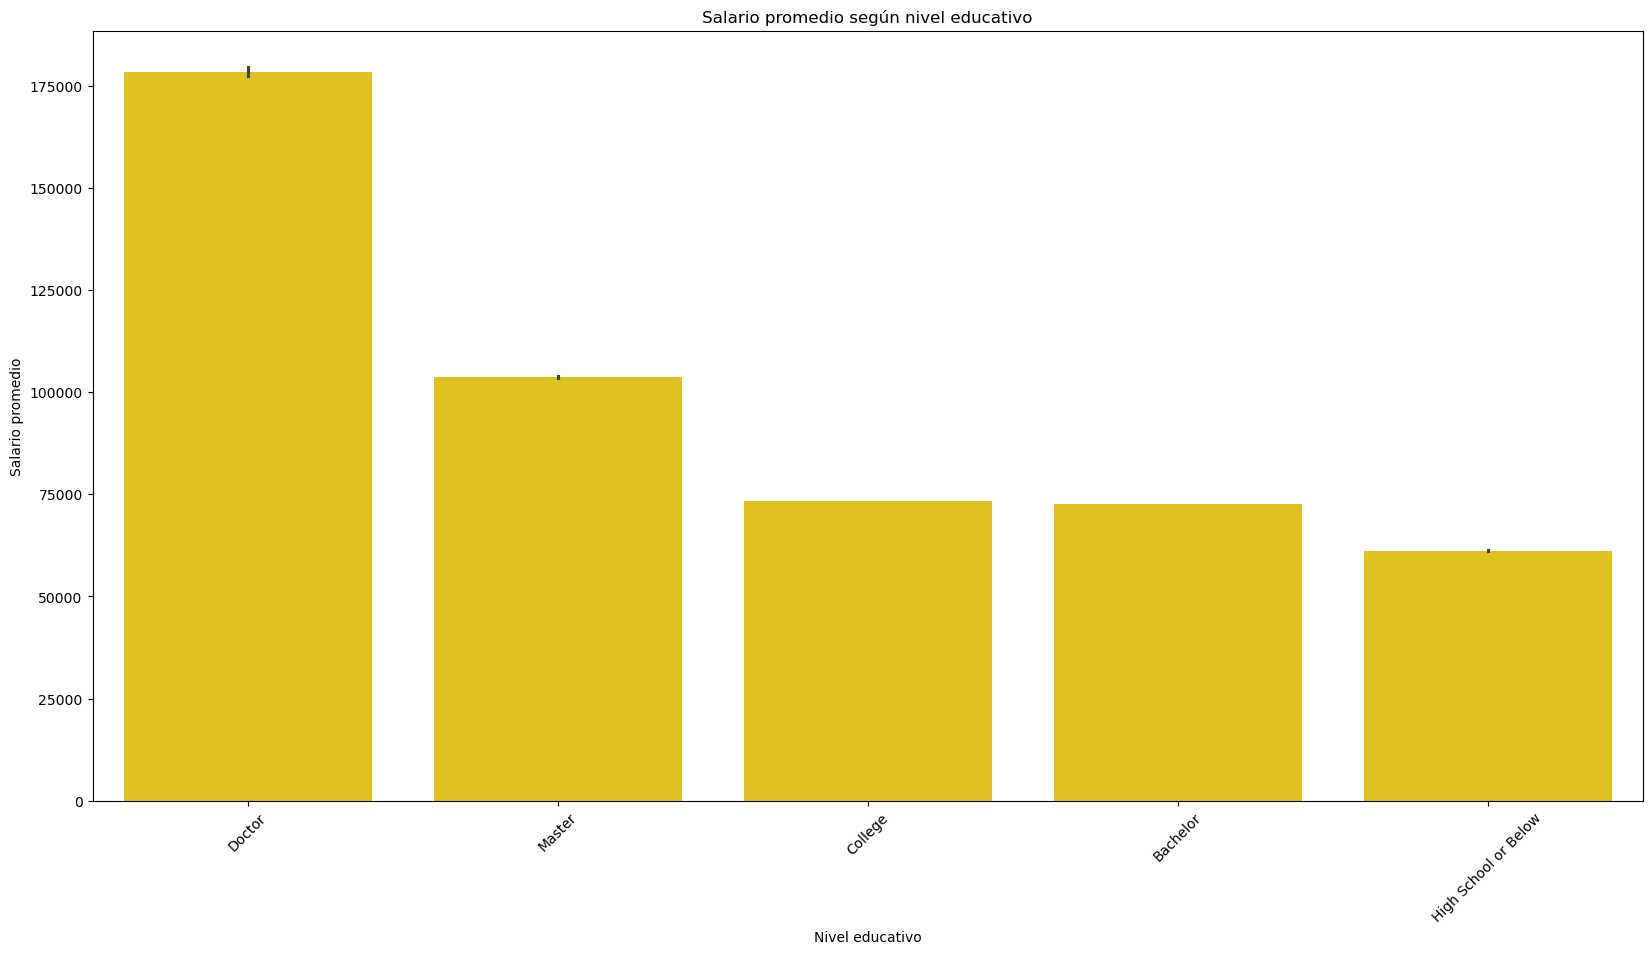

In [572]:
# Calculamos el salario medio por nivel educativo y lo ordenamos
salario_medio = df_unido.groupby("education")["salary"].mean().sort_values(ascending=False)

# Creamos el barplot ordenado por salario medio
plt.figure(figsize=(20,10))
sns.barplot(
    data=df_unido,
    x="education",
    y="salary",
    estimator=np.mean,
    color = "gold",
    order=salario_medio.index  # ordenamos por salario medio
)
plt.title("Salario promedio según nivel educativo")
plt.xlabel("Nivel educativo")
plt.ylabel("Salario promedio")
plt.xticks(rotation=45)
plt.show();

<h3>5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?</h3>

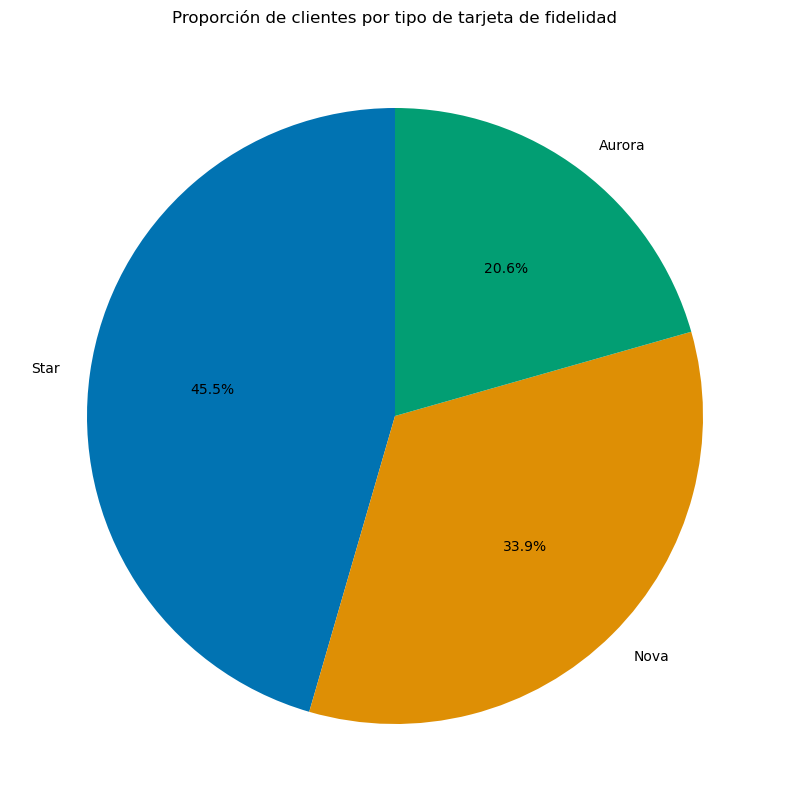

In [573]:
plt.figure(figsize=(10,10))
df_unido["loyalty_card"].value_counts().plot.pie(
    autopct="%1.1f%%",
    startangle=90,
    colors = sns.color_palette("colorblind") 
)
plt.title("Proporción de clientes por tipo de tarjeta de fidelidad")
plt.ylabel("")  # eliminamos la etiqueta del eje y porque plt lo agrega por defecto (aparece "count") y queda "sucio"
plt.show();

<h3>6. ¿Cómo se distribuyen los clientes según su estado civil y género?</h3>

Utilizamos un gráfico de barras agrupadas (countplot con hue). Las dos variables son categóricas, así que para comparar visualmente la cantidad de clientes dentro de cada categoría y agrupar, es la mejor opción. Además, se visualiza inmediatamente si hay desigualdades.

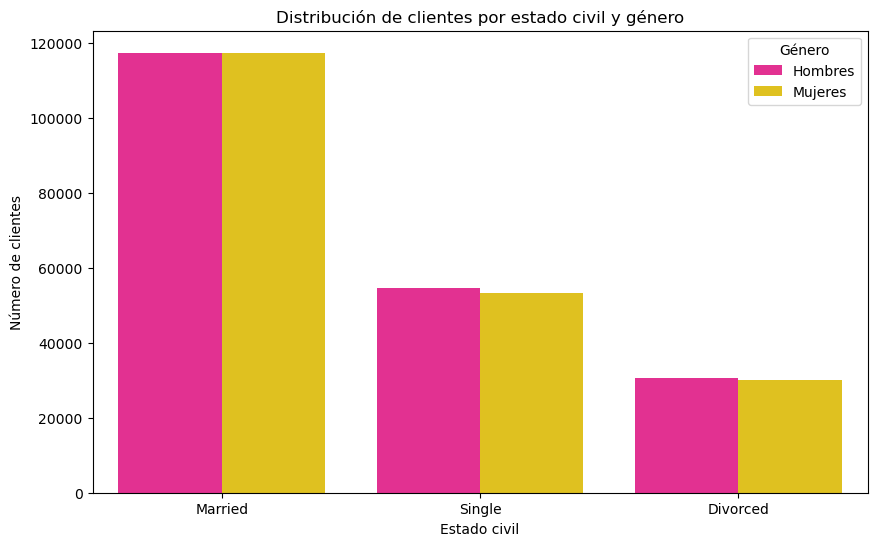

In [574]:
orden_estadocivil = df_unido["marital_status"].value_counts().index

plt.figure(figsize=(10,6))
sns.countplot(data=df_unido, 
              x="marital_status", 
              hue="gender",
              order = orden_estadocivil,
              palette=["deeppink", "gold"]
            )
plt.title("Distribución de clientes por estado civil y género")
plt.xlabel("Estado civil")
plt.ylabel("Número de clientes")

# Renombrar leyenda
plt.legend(title="Género", 
           labels=["Hombres", "Mujeres"])

plt.show();

<h1> BONUS: Fase 3: Evaluación de diferencias en reservas de vuelos por nivel educativo </h1>

Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los pasos que deberás seguir son:

- [x] Preparación de datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.
- [x] Análisis descriptivo: agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estándar del número de vuelos reservados para cada grupo, etc.)
- [x] Prueba estadística: Realiza una prueba de hipótesis para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

<h3> Preparación de datos </h3>

In [575]:
# Seleccionamos las columnas relevantes y hacemos una copia para poder trabajar todo el tiempo solo con estas dos columnas
df_edu = df_unido[["flights_booked", "education"]].copy()

# Revisamos si hay nulos
df_edu.isnull().sum()

flights_booked    0
education         0
dtype: int64

In [576]:
# Agrupamos por educación y calculamos las estadísticas descriptivas básicas
edu_agrupado = df_edu.groupby("education")["flights_booked"]

display(edu_agrupado.describe())

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor,252567.0,4.110288,5.221671,0.0,0.0,1.0,8.0,21.0
College,102260.0,4.169744,5.246040,0.0,0.0,1.0,8.0,21.0
Doctor,17731.0,4.175512,5.256971,0.0,0.0,1.0,8.0,21.0
High School or Below,18915.0,4.176209,5.239267,0.0,0.0,1.0,8.0,21.0
Master,12287.0,4.200700,5.213956,0.0,0.0,1.0,8.0,21.0


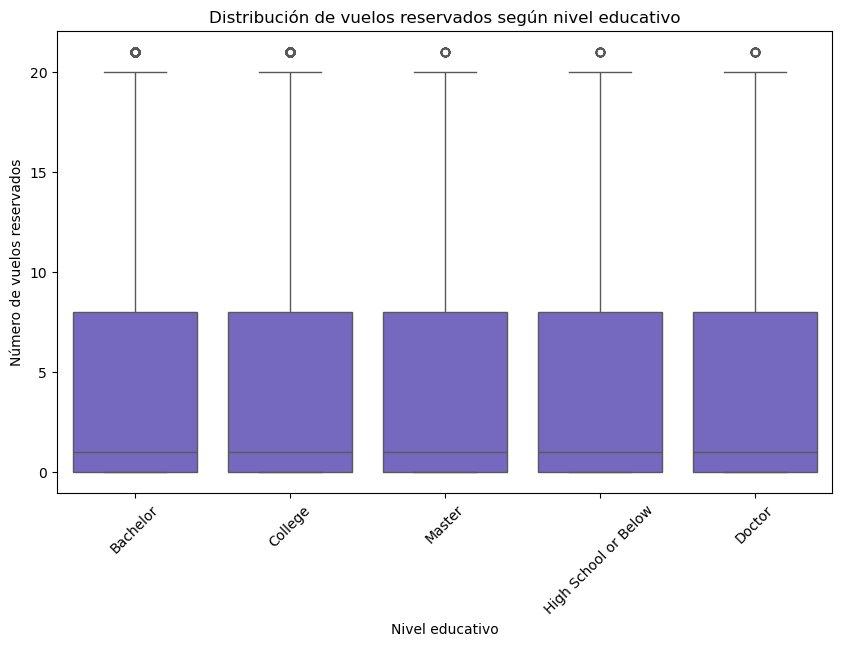

In [577]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_edu,
    x="education",
    y="flights_booked",
    orient="v",
    color="slateblue"
)
plt.title("Distribución de vuelos reservados según nivel educativo")
plt.xlabel("Nivel educativo")
plt.ylabel("Número de vuelos reservados")
plt.xticks(rotation=45)
plt.show();


- No parece que exista una gran diferencia en los vuelos reservados en función del nivel educativo.
- La mayoría reserva pocos vuelos, aunque hay algunos atípicos.
- Si nos basamos en los boxplot, no parece que el nivel educativo influya.

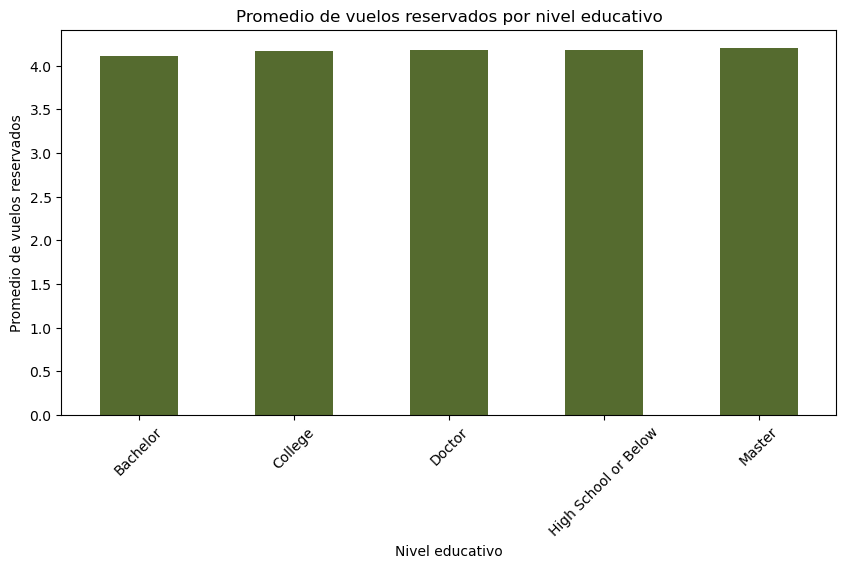

In [578]:
# Agrupamos y calculamos la media
media_vuelos = df_edu.groupby("education")["flights_booked"].mean()

plt.figure(figsize=(10,5))
media_vuelos.plot(kind="bar", 
                  color="darkolivegreen")
plt.title("Promedio de vuelos reservados por nivel educativo")
plt.xlabel("Nivel educativo")
plt.ylabel("Promedio de vuelos reservados")
plt.xticks(rotation=45)
plt.show();

In [579]:
# Obtenemos listas de vuelos por cada nivel educativo
grupos = [df_edu[df_edu['education'] == edu]['flights_booked'] for edu in df_edu['education'].unique()]

# ANOVA
resultado_anova = f_oneway(*grupos)
print("Estadístico F:", resultado_anova.statistic)
print("Valor p:", resultado_anova.pvalue)

Estadístico F: 3.578957738498353
Valor p: 0.006352981736021182


<h3>Resultados de la prueba ANOVA</h3>
La H0 es que no existe diferencia entre el promedio de vuelos reservados por nivel educativo.
La H1 es que sí que existe esa diferencia.

Puesto que el valor p < 0.05, rechazamos la hipótesis nula. Así, hay una diferencia significativa entre las dos muestras. 

El estadístico F es el cociente de varianza entre grupos/varianza dentro de los grupos. Si es sifnificativamente mayor que 1, la variabilidad entre los grupso es mayor que la variabilidad *dentro* de los grupos. 

La combinación entre el valor p y el estadístico F nos dice que sí que hay evidencia para aceptar la hipótesis alternativa (H1)

Por tanto, para tener una respresentación gráfica fiable, hacemos un gráfico alternativo en el que restringimos el rango. Probablemente, el problema de visualización se debe a la gran cantidad de personas que no han reservado ningún vuelo o que solo ha reservado uno, que nos trampea un poco los datos.

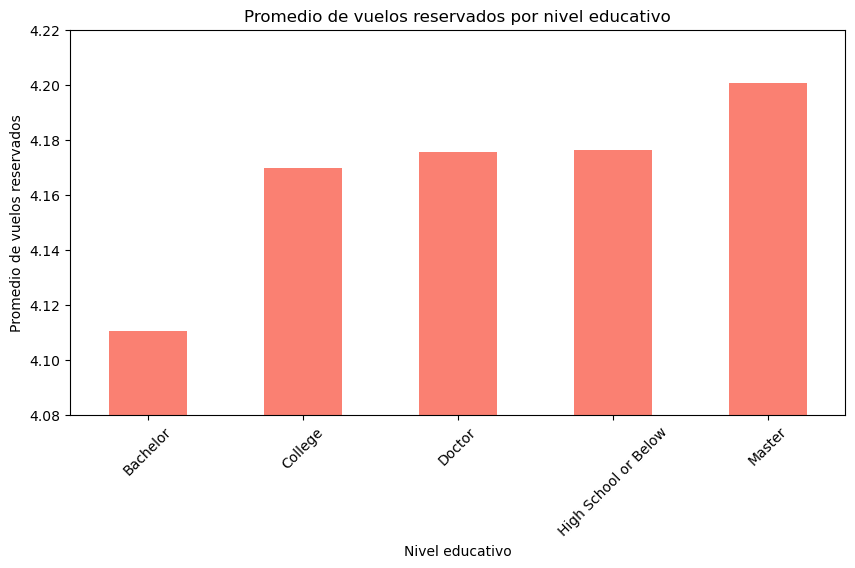

In [580]:
# Aquí repetimos el plot pero limitando el rango del eje y para hacerlo más sensible
media_vuelos = df_edu.groupby("education")["flights_booked"].mean()

plt.figure(figsize=(10, 5))
media_vuelos.plot(kind="bar", 
                  color="salmon")
plt.title("Promedio de vuelos reservados por nivel educativo")
plt.xlabel("Nivel educativo")
plt.ylabel("Promedio de vuelos reservados")
plt.xticks(rotation=45)
plt.ylim(4.08, 4.22)
plt.show();